In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [3]:
def blocking(df, obs, time="t"):
    # blocking
    len_df = max(df[time])
    # blk_num = np.arange(1000, 10000)
    # blk_sizes = [len_df // i for i in blk_num]
    # blk_sizes = np.arange(2, np.floor(len_df), 100, dtype = int)
    blk_sizes = np.arange(2, 2000, 10, dtype = int)
    stdev = np.zeros(len(blk_sizes))
    
    for i, l in enumerate(blk_sizes):
        blk_avg = df[obs].groupby(df[time]//l).mean()
        stdev[i] = np.sqrt(blk_avg.var()/len(blk_avg))
    plt.plot(blk_sizes, stdev, '*-')
    window_size = 6
    kernel = np.ones(window_size) / window_size
    # plt.plot(blk_sizes, np.convolve(stdev, kernel, mode='same'), '*-')
    plt.xlabel("block length [ps]")
    if obs == "T":
        plt.ylabel("estimated error [K]")
        plt.title("Block analisys for the Temperature, hDHFR trajectory")
    elif obs == "P":
        plt.ylabel("estimated error [bar]")
        plt.title("Block analisys for the Pressure, hDHFR trajectory")
    #plt.ylim(0, 0.02)
    # plt.yscale("log")
    plt.show()

In [4]:
window_size = 300
window_size_P = 300

In [5]:
data_path1 = "../../data/02_processed/02_prod/prod_1/"
data_path2 = "../../data/02_processed/02_prod/prod_2/"
data_path3 = "../../data/02_processed/02_prod/prod_3/"
data_path4 = "../../data/02_processed/02_prod/prod_4/"

In [6]:
tem_df1 = pd.read_csv(data_path1 + "prod_1.xvg", header = None, sep = " ", names = ["t", "T", "P", "RMSD", "n"], skipinitialspace=True)
tem_df2 = pd.read_csv(data_path2 + "prod_2.xvg", header = None, sep = " ", names = ["t", "T", "P", "RMSD", "n"], skipinitialspace=True)
tem_df3 = pd.read_csv(data_path3 + "prod_3.xvg", header = None, sep = " ", names = ["t", "T", "P", "RMSD", "n"], skipinitialspace=True)
tem_df4 = pd.read_csv(data_path4 + "prod_4.xvg", header = None, sep = " ", names = ["t", "T", "P", "RMSD", "n"], skipinitialspace=True)

tem_df = pd.concat([tem_df1, tem_df2, tem_df3, tem_df4])
tem_df["t"] = 2 * np.arange(len(tem_df))

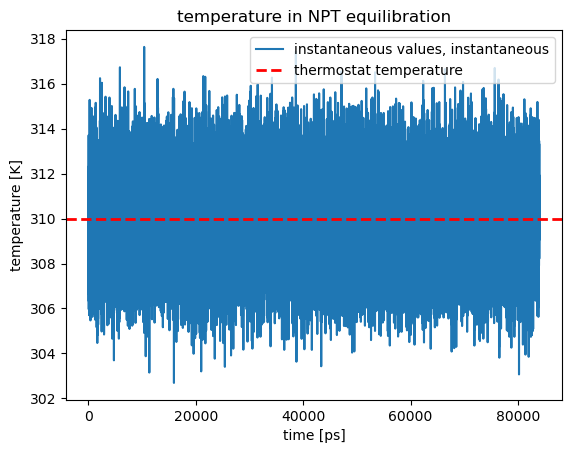

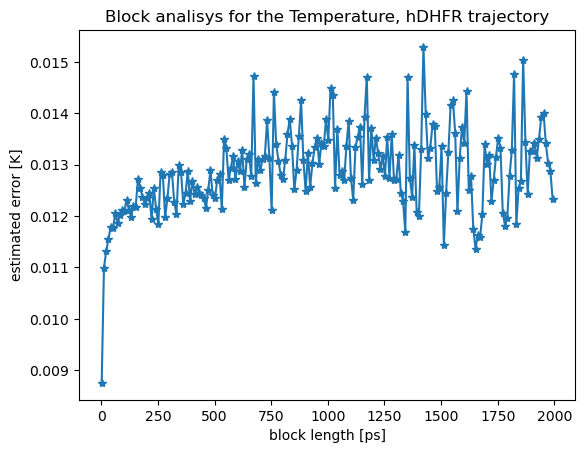

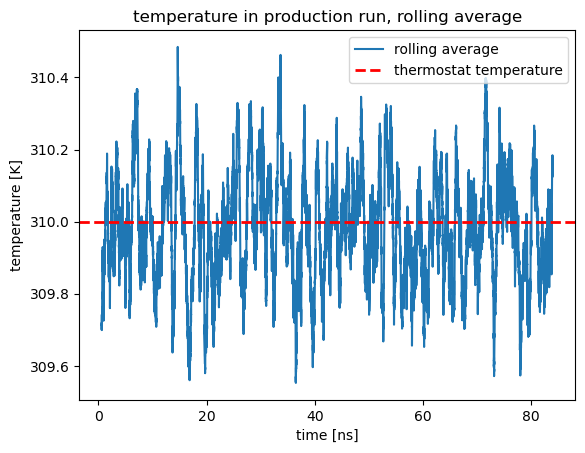

=== TOTAL AVERAGE: 309.9798984788592 \pm 0.01 ===


In [7]:
plt.plot(tem_df["t"], tem_df["T"], label = "instantaneous values, instantaneous")
plt.title("temperature in NPT equilibration")
plt.xlabel("time [ps]")
plt.ylabel("temperature [K]")
plt.axhline(y=310, color='r', linestyle='--', linewidth=2, label = "thermostat temperature")
plt.legend()
plt.show()

blocking(tem_df, obs = "T") # N_eff = 20, error \approx 0.1

# errors_temp = np.sqrt(tem_df["T"].rolling(window_size).var() / (len(tem_df["T"]) / window_size))
error_temp = 0.01
cum_temp = tem_df["T"].rolling(window_size).mean()
plt.plot(tem_df["t"] / 1000, cum_temp, label = "rolling average")
# plt.fill_between(tem_df["t"] / 1000, cum_temp + errors_temp, cum_temp - errors_temp, alpha=0.3)
plt.title("temperature in production run, rolling average")
plt.xlabel("time [ns]")
plt.ylabel("temperature [K]")
plt.axhline(y=310, color='r', linestyle='--', linewidth=2, label = "thermostat temperature")
plt.legend()
plt.show()

print(f"=== TOTAL AVERAGE: {tem_df["T"].mean()} \\pm {error_temp} ===")

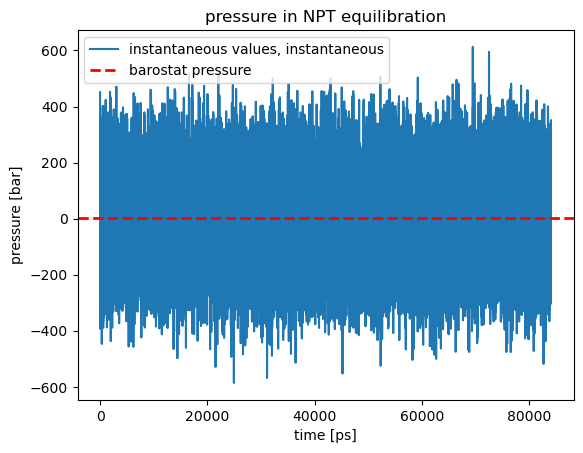

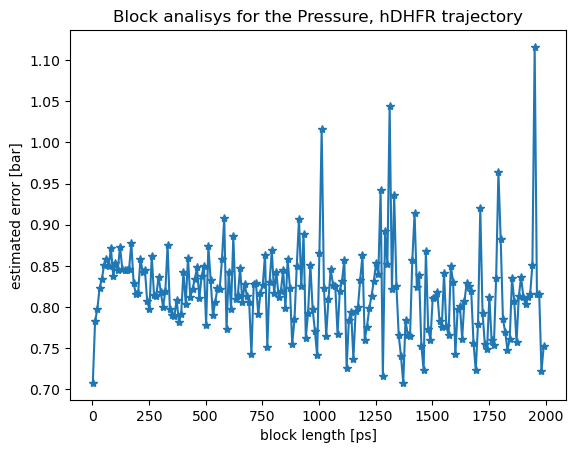

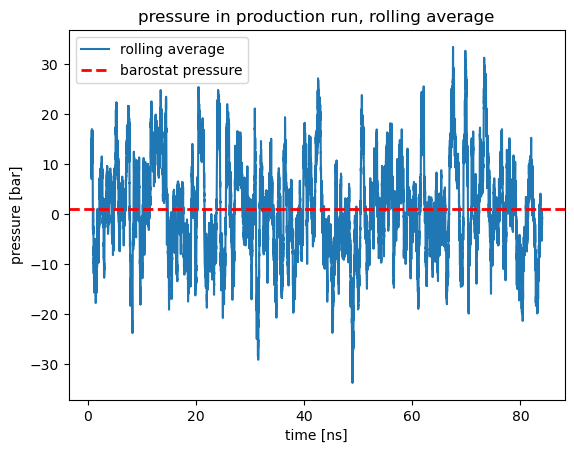

=== TOTAL AVERAGE: 0.8750354556470816 \pm 0.9 ===


In [8]:
plt.plot(tem_df["t"], tem_df["P"], label = "instantaneous values, instantaneous")
plt.title("pressure in NPT equilibration")
plt.xlabel("time [ps]")
plt.ylabel("pressure [bar]")
plt.axhline(y=1, color='r', linestyle='--', linewidth=2, label = "barostat pressure")
plt.legend()
plt.show()

blocking(tem_df, obs = "P") # N_eff = 20, error \approx 0.1

# errors_press = np.sqrt(tem_df["P"].rolling(window_size_P).var() / (len(tem_df["P"]) / window_size_P))
error_press = 0.9
cum_press = tem_df["P"].rolling(window_size_P).mean()
plt.plot(tem_df["t"] / 1000, cum_press, label = "rolling average")
# plt.fill_between(tem_df["t"] / 1000, cum_press + errors_press, cum_press - errors_press, alpha=0.3)
plt.title("pressure in production run, rolling average")
plt.xlabel("time [ns]")
plt.ylabel("pressure [bar]")
plt.axhline(y=1, color='r', linestyle='--', linewidth=2, label = "barostat pressure")
plt.legend()
plt.show()

print(f"=== TOTAL AVERAGE: {tem_df["P"].mean()} \\pm {error_press} ===")

In [9]:
plt.plot(tem_df[0], tem_df[4], label = "instantaneous values")
plt.plot(tem_df[0], tem_df[4].expanding().mean(), label = "cumulative average")
plt.title("density in NVT equilibration")
plt.xlabel("time [ps]")
plt.ylabel("density [kg / m^3]")
# plt.axhline(y=310, color='r', linestyle='--', linewidth=2, label = "thermostat temperature")
plt.legend()
plt.show()

KeyError: 0